In [49]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as gp
from IPython.display import SVG, display
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [50]:
# Import the dataset
data=pd.read_csv("./IMDB-Movies.csv")
data.head()

,Unnamed: 0,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
0,1,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32
1,2,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57
2,3,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15
3,4,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99
4,5,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68


In [51]:
# Cluster the movies based on the numerical variables excluding "Year"
final_data = data.iloc[:, 7:11]
final_data.head()

,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
0,152,9.0,1791916,533.32
1,148,8.8,1583625,292.57
2,161,8.8,48969,11.15
3,169,8.6,1047747,187.99
4,106,8.6,34110,4.68


In [52]:
# Check the unique values for each column
final_data.nunique()

Runtime..Minutes.     40
Rating                 8
Votes                 50
Revenue..Millions.    47
dtype: int64

In [53]:
# Check the missing value of data
final_data.isnull().sum()

Runtime..Minutes.     0
Rating                0
Votes                 0
Revenue..Millions.    3
dtype: int64

### Drop the missing value of Revenue Millions

In [54]:
final_data = final_data.dropna()
final_data.head()

,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
0,152,9.0,1791916,533.32
1,148,8.8,1583625,292.57
2,161,8.8,48969,11.15
3,169,8.6,1047747,187.99
4,106,8.6,34110,4.68


In [55]:
# Check the missing value of data
final_data.isnull().sum()

Runtime..Minutes.     0
Rating                0
Votes                 0
Revenue..Millions.    0
dtype: int64

In [56]:
final_data

,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
0,152,9.0,1791916,533.32
1,148,8.8,1583625,292.57
2,161,8.8,48969,11.15
3,169,8.6,1047747,187.99
4,106,8.6,34110,4.68
5,112,8.6,557965,13.18
6,130,8.5,913152,53.08
7,151,8.5,937414,132.37
8,164,8.5,1222645,448.13
9,107,8.5,477276,13.09


### Check the correlation matrix


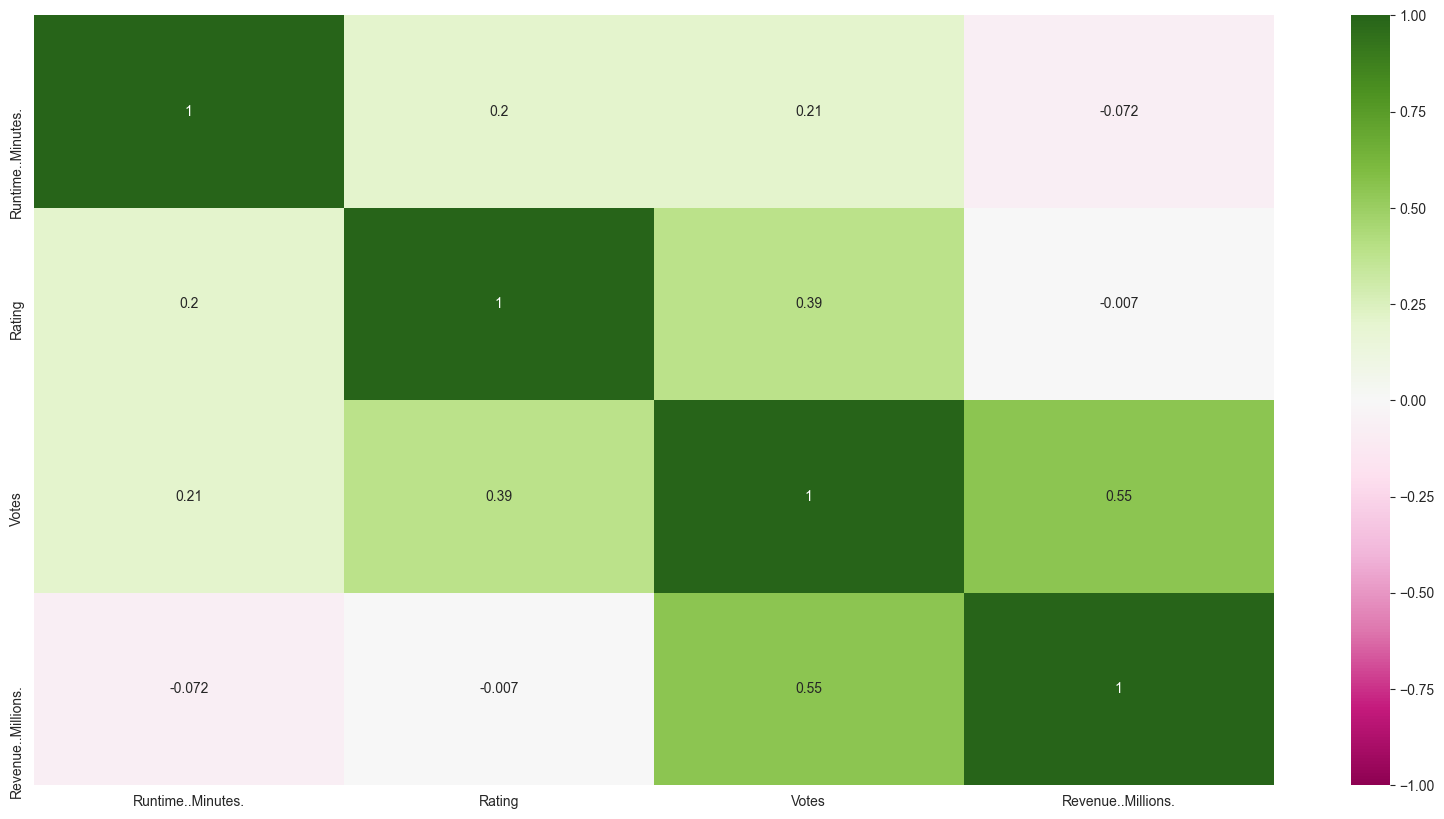

In [57]:
fig, axs = plt.subplots(figsize=(20, 10))
sns.heatmap(final_data.corr(), annot=True, vmin=-1, vmax=1, cmap='PiYG')
plt.show()

### Check the distribution of each column

/opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 0, 'Attributes')

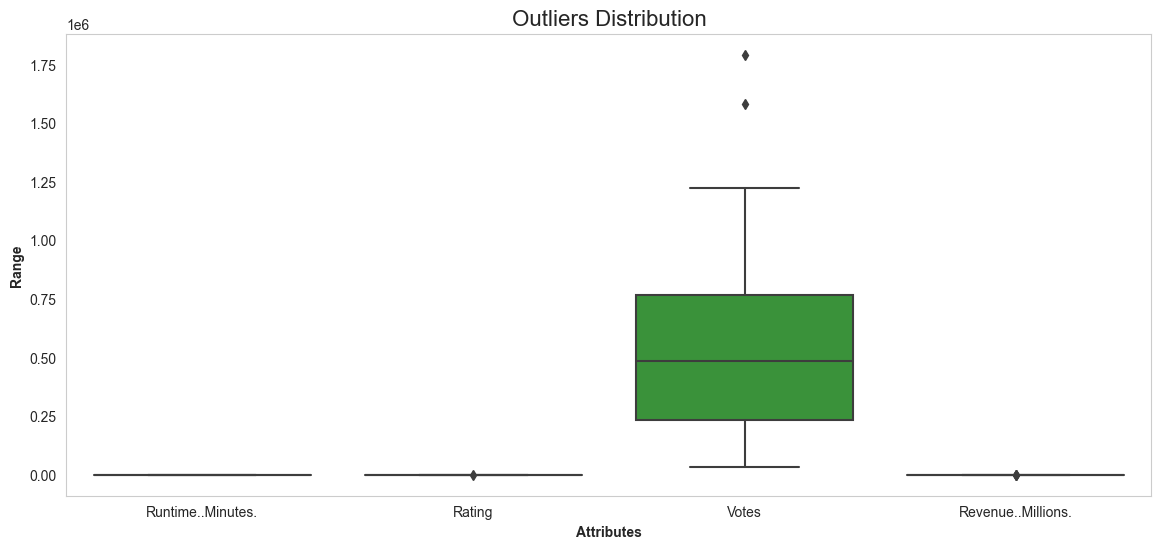

In [58]:
plt.rcParams['figure.figsize'] = [14,6]
sns.boxplot(data = final_data, orient="v")
plt.title("Outliers Distribution", fontsize = 16)
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

### Scaling the dataset

In [59]:
scaler = StandardScaler()
final_data = pd.DataFrame(scaler.fit_transform(final_data.values), columns=final_data.columns, index=final_data.index)

/opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 0, 'Attributes')

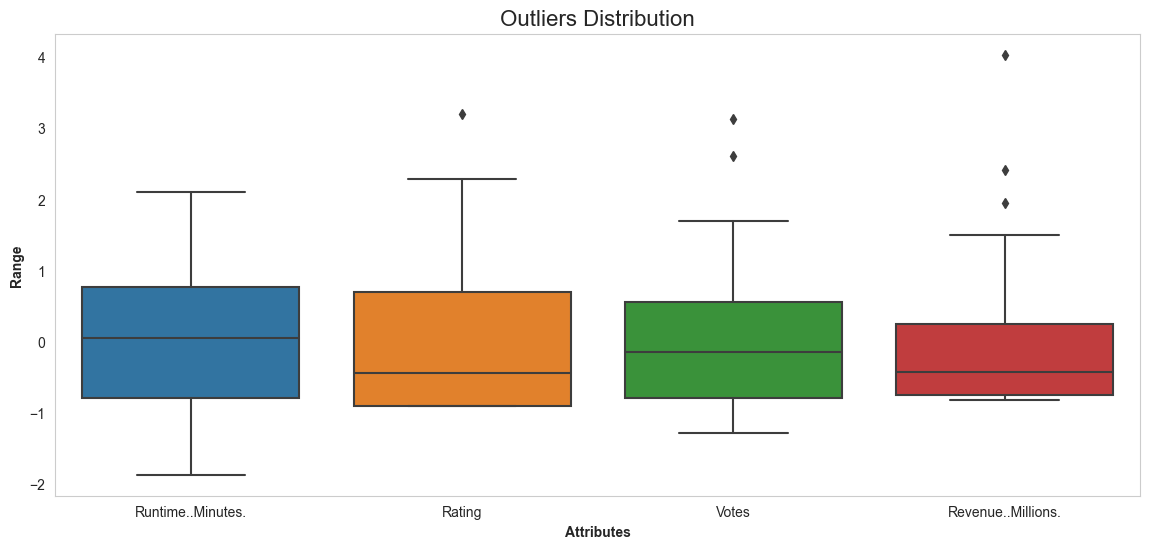

In [60]:
plt.rcParams['figure.figsize'] = [14,6]
sns.boxplot(data = final_data, orient="v")
plt.title("Outliers Distribution", fontsize = 16)
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

### Using hierarchical clustering on the dataset

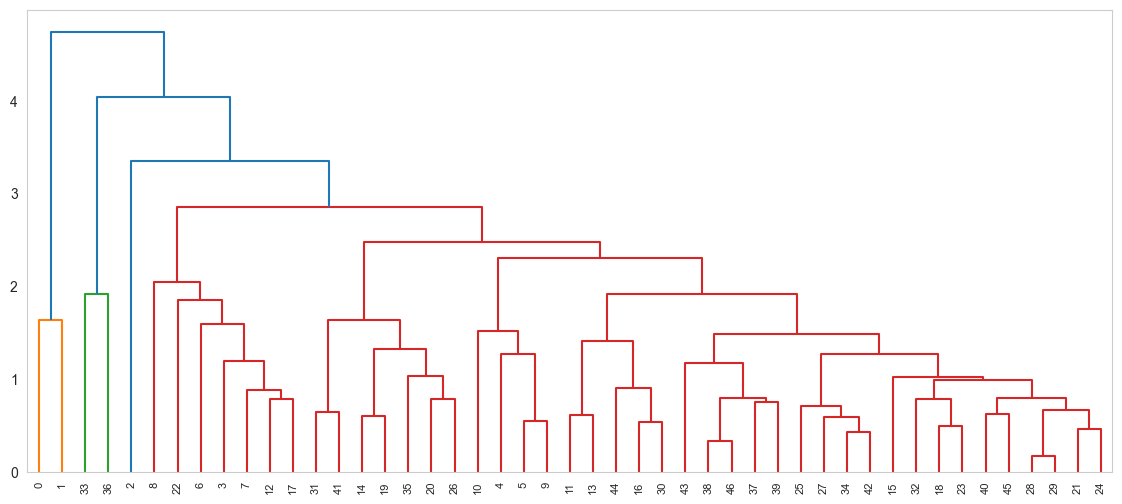

In [61]:
Z1 = linkage(final_data,method='average')
dendrogram(Z1)
plt.show()

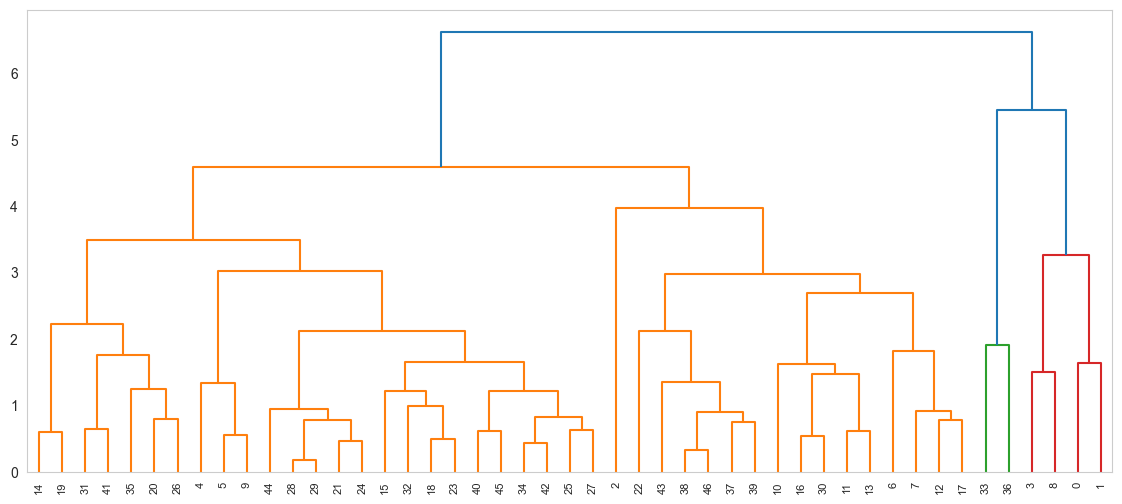

In [62]:
Z2 = linkage(final_data,method='complete')
dendrogram(Z2)
plt.show()

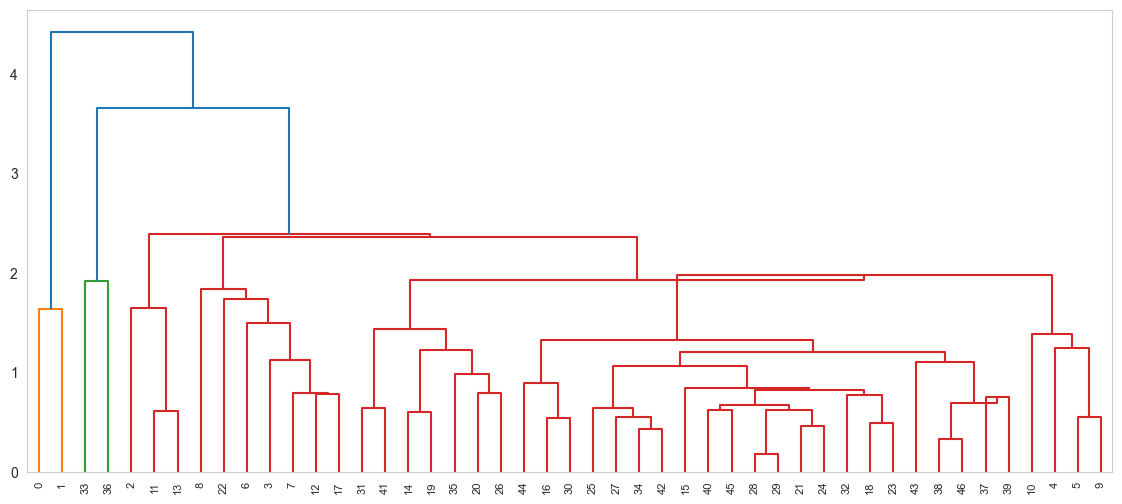

In [63]:
Z3 = linkage(final_data,method='centroid')
dendrogram(Z3)
plt.show()

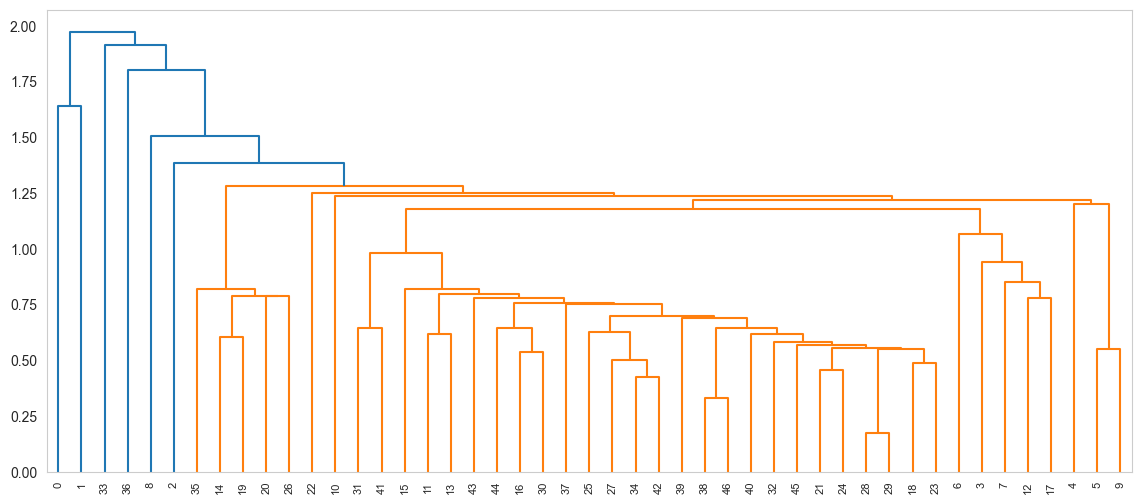

In [64]:
Z4 = linkage(final_data,method='single')
dendrogram(Z4)
plt.show()

In [65]:
labels=fcluster(Z2, 3, criterion='maxclust') 

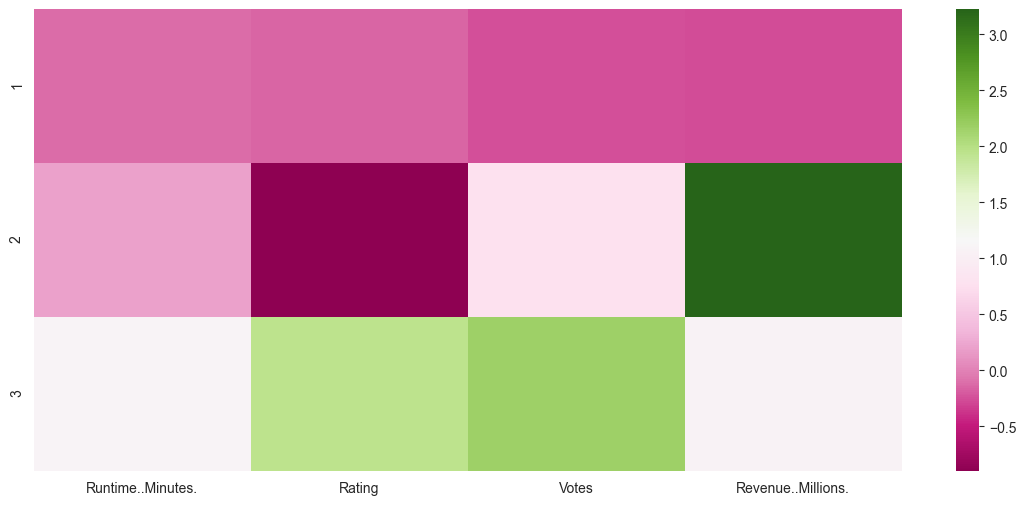

In [66]:
# plot the average value of the scores taken on for each feature in that cluster and put this into a heatmap to better visualize
final_data_hier=final_data.copy()
final_data_hier["Labels"] = labels
final_data_hier=final_data_hier.groupby(final_data_hier["Labels"]).mean().reset_index()
final_data_hier=final_data_hier.drop(columns=["Labels"]).set_index(np.arange(1,4))
sns.heatmap(final_data_hier,cmap="PiYG")
plt.show()

In [67]:
final_data_hier

,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
1,-0.116207,-0.145700,-0.249854,-0.262214
2,0.209467,-0.900412,0.774260,3.223310
3,1.086392,1.943632,2.173871,1.076041


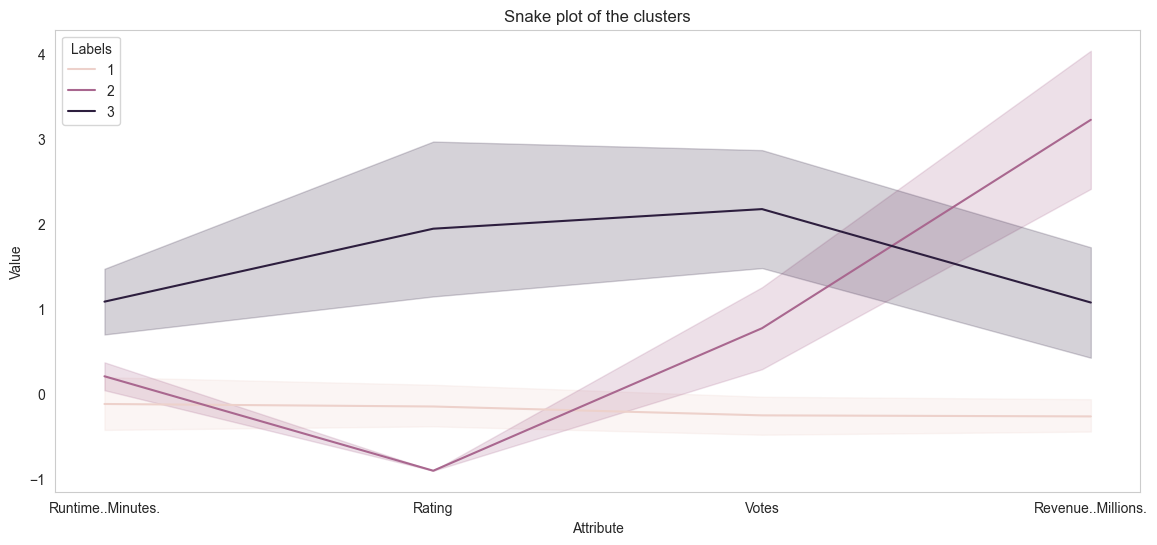

In [68]:
# Instead of just plotting the average values, we can draw a snake plot that also includes the range of values around the mean.
final_data_plot=final_data.copy()
final_data_plot["Labels"]=labels
final_data_melt = pd.melt(final_data_plot.reset_index(),
                            id_vars=["Labels"],
                            value_vars=["Runtime..Minutes.", "Rating", "Votes", "Revenue..Millions."],
                            var_name='Attribute',value_name='Value')
plt.title('Snake plot of the clusters')
sns.lineplot(x="Attribute", y="Value", hue='Labels', data=final_data_melt)
plt.show()

In [69]:
final_data_plot

,Runtime..Minutes.,Rating,Votes,Revenue..Millions.,Labels
0,0.794084,3.195012,3.128294,1.945500,3
1,0.607006,2.284917,2.605737,0.698180,3
2,1.215008,2.284917,-1.244378,-0.759851,1
3,1.589163,1.374823,1.261337,0.156353,3
4,-1.357306,1.374823,-1.281656,-0.793372,1
5,-1.076690,1.374823,0.032582,-0.749334,1
6,-0.234842,0.919776,0.923668,-0.542613,1
7,0.747314,0.919776,0.984536,-0.131813,1
8,1.355316,0.919776,1.700118,1.504132,3
9,-1.310537,0.919776,-0.169849,-0.749800,1


### Add the labels into dataset

In [70]:
data["Labels"] = final_data_plot["Labels"]
data_with_label = data.iloc[:, 7:12]
data_with_label = data_with_label.dropna()
data_with_label

,Runtime..Minutes.,Rating,Votes,Revenue..Millions.,Labels
0,152,9.0,1791916,533.32,3.0
1,148,8.8,1583625,292.57,3.0
2,161,8.8,48969,11.15,1.0
3,169,8.6,1047747,187.99,3.0
4,106,8.6,34110,4.68,1.0
5,112,8.6,557965,13.18,1.0
6,130,8.5,913152,53.08,1.0
7,151,8.5,937414,132.37,1.0
8,164,8.5,1222645,448.13,3.0
9,107,8.5,477276,13.09,1.0


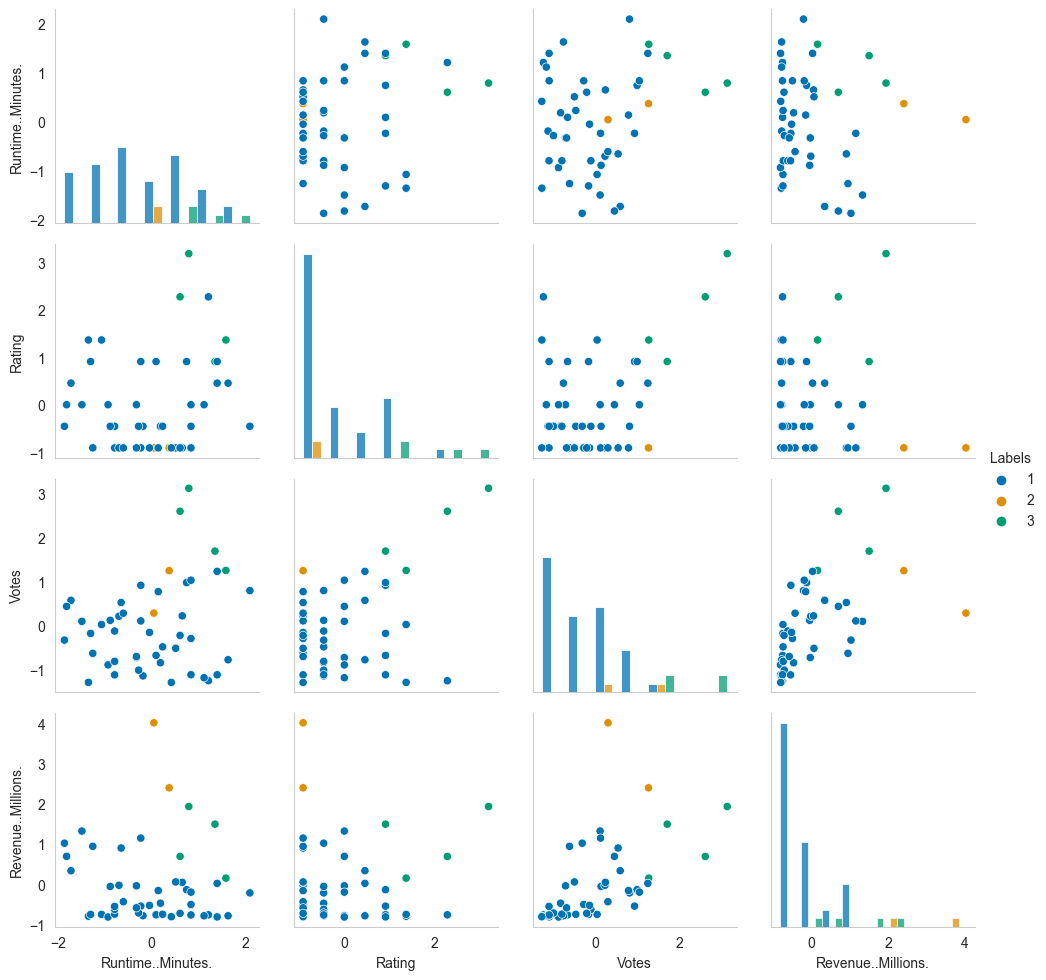

In [71]:
sns.set_style("whitegrid", {'axes.grid' : False})

# Visualise the clusters
final = sns.PairGrid(final_data_plot, hue='Labels', palette='colorblind')
final.map_diag(sns.histplot, multiple='dodge')
final.map_offdiag(sns.scatterplot)
final.add_legend()